# Part I: Theory Questions

#### What are differences between logistic regression and linear regression?

Linear regression works on continuous variables against to that logistic regression works
on categorical limited variables. For example, if you are trying to the prediction on weights,
heights you should use linear regression but if you want to make a prediction about colors
or categorical classes you should use logistic regression. Linear regression is based on least
square estimation it minimizes the sum of the squared distances of each observed response
to its fitted value. While logistic regression is based on Maximum Likelihood Estimation it
maximizes the Probability of Y given X

#### What are differences between logistic regression and naive bayes methods?

Naive Bayes and Logistic Regression are a ”generative-discriminative pair,” meaning they
have the same model form of a linear classifier, but they estimate parameters in different
ways. Both logistic regression and Naive Bayes have the same hypothesis space, but optimize
different objective functions. In particular logistic regression maximizes;

$$\sum _ { i } \log P _ { \theta } \left( y _ { i } | x _ { i } \right)$$
whereas Naive Bayes maximizies;
$$\sum _ { i } \log P _ { \theta } \left( y _ { i } | x _ { i } \right) + \sum _ { i } \log P _ { \theta , \phi } \left( x _ { i } \right)$$

Naive Bayes is the better choice for small data sets (Logistic Regression will overfit). For
large data sets, the winner is Logistic Regression.

#### Which of the following statements are true?

$\cdot$ A two layer (one input layer, one output layer; no hidden layer) neural network
can represent the XOR function. $-->T$

$\cdot$ Any logical function over binary-valued $( 0$ or 1$)$ inputs $x _ { 1 }$ and $x _ { 2 }$ can be $($ ap-
proximately $)$ represented using some neural network. $-->T$

$\cdot$ Suppose you have a multi-class classification problem with three classes,
trained with a 3 layer network. Let $a _ { 1 } ^ { ( 3 ) } = \left( h _ { \Theta } ( x ) \right) _ { 1 }$ be the activation of
the first output unit and similarly $a _ { 2 } ^ { ( 3 ) } = \left( h _ { \Theta } ( x ) \right) _ { 2 }$ and $a _ { 3 } ^ { ( 3 ) } = \left( h _ { \Theta } ( x ) \right) _ { 3 } .$ Then
for any input $x ,$ it must be the case that that $a _ { 1 } ^ { ( 3 ) } + a _ { 2 } ^ { ( 3 ) } + a _ { 3 } ^ { ( 3 ) } = 1$ $-->F$

$\cdot$ The activation values of the hidden units in a neural network, with the sigmoid
activation function applied at every layer, are always in the range $( 0,1 )$ . $-->T$

#### How to decide the number of hidden layers and nodes in a hidden layer?

With cross-validation 

# PART II: Classification of Flowers using Neural Network

##   INTRODUCTIONS


Developing a system for classification of flowers is a difficult task because of considerable similarities among different classes. Applications of classification of flowers can be found useful in floriculture, flower searching for patent analysis, etc. In such cases, automation of flower classification is essential. Since these activities are done manually and are very labor intensive, automation of the classification of flower images is a necessary task.

In this assignment we have a data collection of 3000 flowers belonging to five different classes. We will try to create artificial neural network by using these flowers as training data. Firstly we will try to classify by using single layer neural network, and then compare the results by trying to classify with multilayer neural network and try to determine what is the most appropriate structure for flower classification as a result of our experiments.

## How artificial neural networks work

A neural network usually involves a large number of processors operating in parallel and arranged in tiers. The first tier receives the raw input information analogous to optic nerves in human visual processing. Each successive tier receives the output from the tier preceding it, rather than from the raw input in the same way neurons further from the optic nerve receive signals from those closer to it. The last tier produces the output of the system. Each processing node has its own small sphere of knowledge, including what it has seen and any rules it was originally programmed with or developed for itself. 

Neural networks are notable for being adaptive, which means they modify themselves as they learn from initial training and subsequent runs provide more information about the world. The most basic learning model is centered on weighting the input streams, which is how each node weights the importance of input from each of its predecessors. Inputs that contribute to getting right answers are weighted higher.





## How neural networks learn
Unlike other algorithms, neural networks with their deep learning cannot be programmed directly for the task. Rather, they have the requirement, just like a child’s developing brain, that they need to learn the information. The learning strategies go by three methods:

- Supervised learning: This learning strategy is the simplest, as there is a labeled dataset, which the computer goes through, and the algorithm gets modified until it can process the dataset to get the desired result.

- Unsupervised learning: This strategy gets used in cases where there is no labeled dataset available to learn from. The neural network analyzes the dataset, and then a cost function then tells the neural network how far off of target it was. The neural network then adjusts to increase accuracy of the algorithm.

- Reinforced learning: In this algorithm, the neural network is reinforced for positive results, and punished for a negative result, forcing the neural network to learn over time.

We will use supervised learning method in this assignment.

## Paramater Initialization

In [1]:
class Neural_Network(object):
    def __init__(self,layersize,nodesize,activation,shape1,shape2):
        #parameters
        self.inputSize = shape1
        self.outputSize = shape2
        self.batch= 0
        self.batcherror= np.zeros((1,shape2))
        self.hiddenSize = nodesize
        self.layersize =layersize

        if activation == "sigmoid":
            self.activationfunc=self.sigmoid
            self.activationDerivative = self.derivative_sigmoid
        elif activation == "relu":
            self.activationfunc = self.ReLU
            self.activationDerivative = self.derivative_Relu

        self.W=list()
        self.B=list()

        for i in range(self.layersize+1):
            if i ==0:
                if layersize !=0:
                    self.W.append(2*np.random.random([self.inputSize, self.hiddenSize])-1)
                    self.B.append(np.ones((1,self.hiddenSize)))

                else:
                    self.W.append(2*np.random.random([self.inputSize,self.outputSize])-1) 
                    self.B.append(np.ones((1,self.outputSize)))

            elif i == layersize:
                self.W.append(2*np.random.random([self.hiddenSize, self.outputSize])-1)
                self.B.append(np.ones((1,self.outputSize)))
            else:
                self.W.append(2*np.random.random([self.hiddenSize, self.hiddenSize])-1)
                self.B.append(np.ones((1,self.hiddenSize)))


We’ll first initialize the weight matrices and the bias vectors. It’s important to note that we shouldn’t initialize all the parameters to zero because doing so will lead the gradients to be equal and on each iteration the output would be the same and the learning algorithm won’t learn anything. Therefore, it’s important to randomly initialize the parameters to values between 0 and 1.

And we need to determine which activation function to use. I used two different activation function :

- "sigmoid" : The main reason why we use sigmoid function is because it exists between (0 to 1). Therefore, it is especially used for models where we have to predict the probability as an output.Since probability of anything exists only between the range of 0 and 1, sigmoid is the right choice.

- "ReLu" : Range: [0 to infinity] That all the negative values become zero immediately which decreases the ability of the model to fit or train from the data properly. That means any negative input given to the ReLU activation function turns the value into zero immediately.

### Forward Propagate & Loss Function

The natural step to do after initialising the model at random, is to check its performance.
We start from the input we have, we pass them through the network layer and calculate the actual output of the model streightforwardly.

In [2]:
 def forward(self, X):
        #forward propagation through our network

        self.outsa=list()
        self.z = X
        self.outsa.append(X)
        for i in range(len(self.W)):

            self.z = self.z.dot(self.W[i])
            self.z+= self.B[i]
            self.z = self.activationfunc(self.z)
            self.outsa.append(self.z)
        
        outsoft = self.softmax(self.z)


This step is called forward-propagation, because the calculation flow is going in the natural forward direction from the input -> through the neural network -> to the output.

At the "Loss" stage, in one hand, we have the actual output of the randomly initialize neural network. On the other hand, we have the desired output we would like the network to learn.

Here we use cross-entropy as loss function. Of course, before we go through this softmax classifier, we turn our results into probability distribution. 





### What is the Softmax

Softmax function takes an N-dimensional vector of real numbers and transforms
it into a vector of real number in range $( 0,1 )$ which add upto $ p _ { i } = \frac { e ^ { a _ { i } } } { \sum _ { k = 1 } ^ { N } e _ { k } ^ { a } }$

As the name suggests, softmax function is a “soft” version of max function. Instead of selecting one maximum value, it breaks the whole $( 0,1 )$ with maximal element getting the largest portion of the distribution, but other smaller elements getting some of it as well.

This property of softmax function that it outputs a probability distribution makes it suitable for probabilistic interpretation in classification tasks.


In [3]:
    def softmax(self,x):
        exps = np.exp(x)
        return exps / np.sum(exps)
# this is simply implement for softmax 


### What is the Cross-Entropy

Cross entropy indicates the distance between what the model believes the output
distribution should be, and what the original distribution really is. It is defined
as, $H ( y , p ) =  - \sum \mathrm { yi } \cdot \log ( \mathrm { pi } ) + ( 1 - \mathrm { yi } ) \cdot \log ( 1 - \mathrm { pi } )$ Cross entropy measure is a widely used alternative of squared error. It is used when node activations can be understood as representing the probability that each hypothesis might be true, i.e. when the output is a probability distribution. Thus it is used as a loss function in neural networks which have softmax activations in the output layer.

In [4]:
    def cross_entropy(self,out,y):

        #E = – ∑ ci . log(pi) + (1 – ci ). log(1 – pi)
        log_likelihood =-((y*np.log10(out) ) + ((1-y) * np.log10(1-out)))

        return log_likelihood.sum()

### Back Propagate


 The backpropagation is most crucial point of artificial neural network. Because all weight and bias values are updated this part. We update weights with gradient descent algorithm. If we use a multilayer neural network we need to calculate all weigths derivative with error comes from coss function. In doing so, we use the "chain rule" method. In this way, the "learning", which is the basic logic in artificial neural networks, is realized.

The implementation is likely forward propagation but this time we calculate the derivatives activation function. And used $alpha$ to determine the learning rate.


In [5]:
    def backward(self,output,alpha):

        self.delta = output
        self.delta *= alpha
        self.delta *= self.activationDerivative(self.outsa[self.layersize+1])
        for i in reversed(range(len(self.W))):

            self.B[i] += self.delta
            self.o_error = self.outsa[i].T.dot(self.delta)
            self.delta = self.delta.dot(self.W[i].T) * self.activationDerivative(self.outsa[i])
            self.W[i] += self.o_error

## Hyperparameters Analysis

### Hidden Layer & Node Size

If a neural network has only an input and output layer, it is called a single layer neural network. When this is the case, there may be some problems in learning. Because single layer neural network is not a good machine learning method for linearly non-separable data . The most common example is the XOR problem. But we use the multilayer neural network we will solve this problem. 

When using multilayer , a hidden layer and node size important. Because if we use a few hidden layers, we may encounter errors such as overfits, and if we use multiple layers we may encounter errors such as overflow. The best method of determining the optimum layer and node size is implement of cross-validation with given train data.


#### Layer Effect for Learning 

![Schoastic%5BActivation:%20sigmoid%20,%20Learnin%20rate:%200.02,%20Singlelayer%20%5D.png](attachment:/singlelayer_results/Schoastic%5BActivation:%20sigmoid%20,%20Learnin%20rate:%200.02,%20Singlelayer%20%5D.png)

Here we see that the singl layer's learning success is low compared to multilayer results because it contains less weight and therefore cannot produce special reflexes for some stuations.

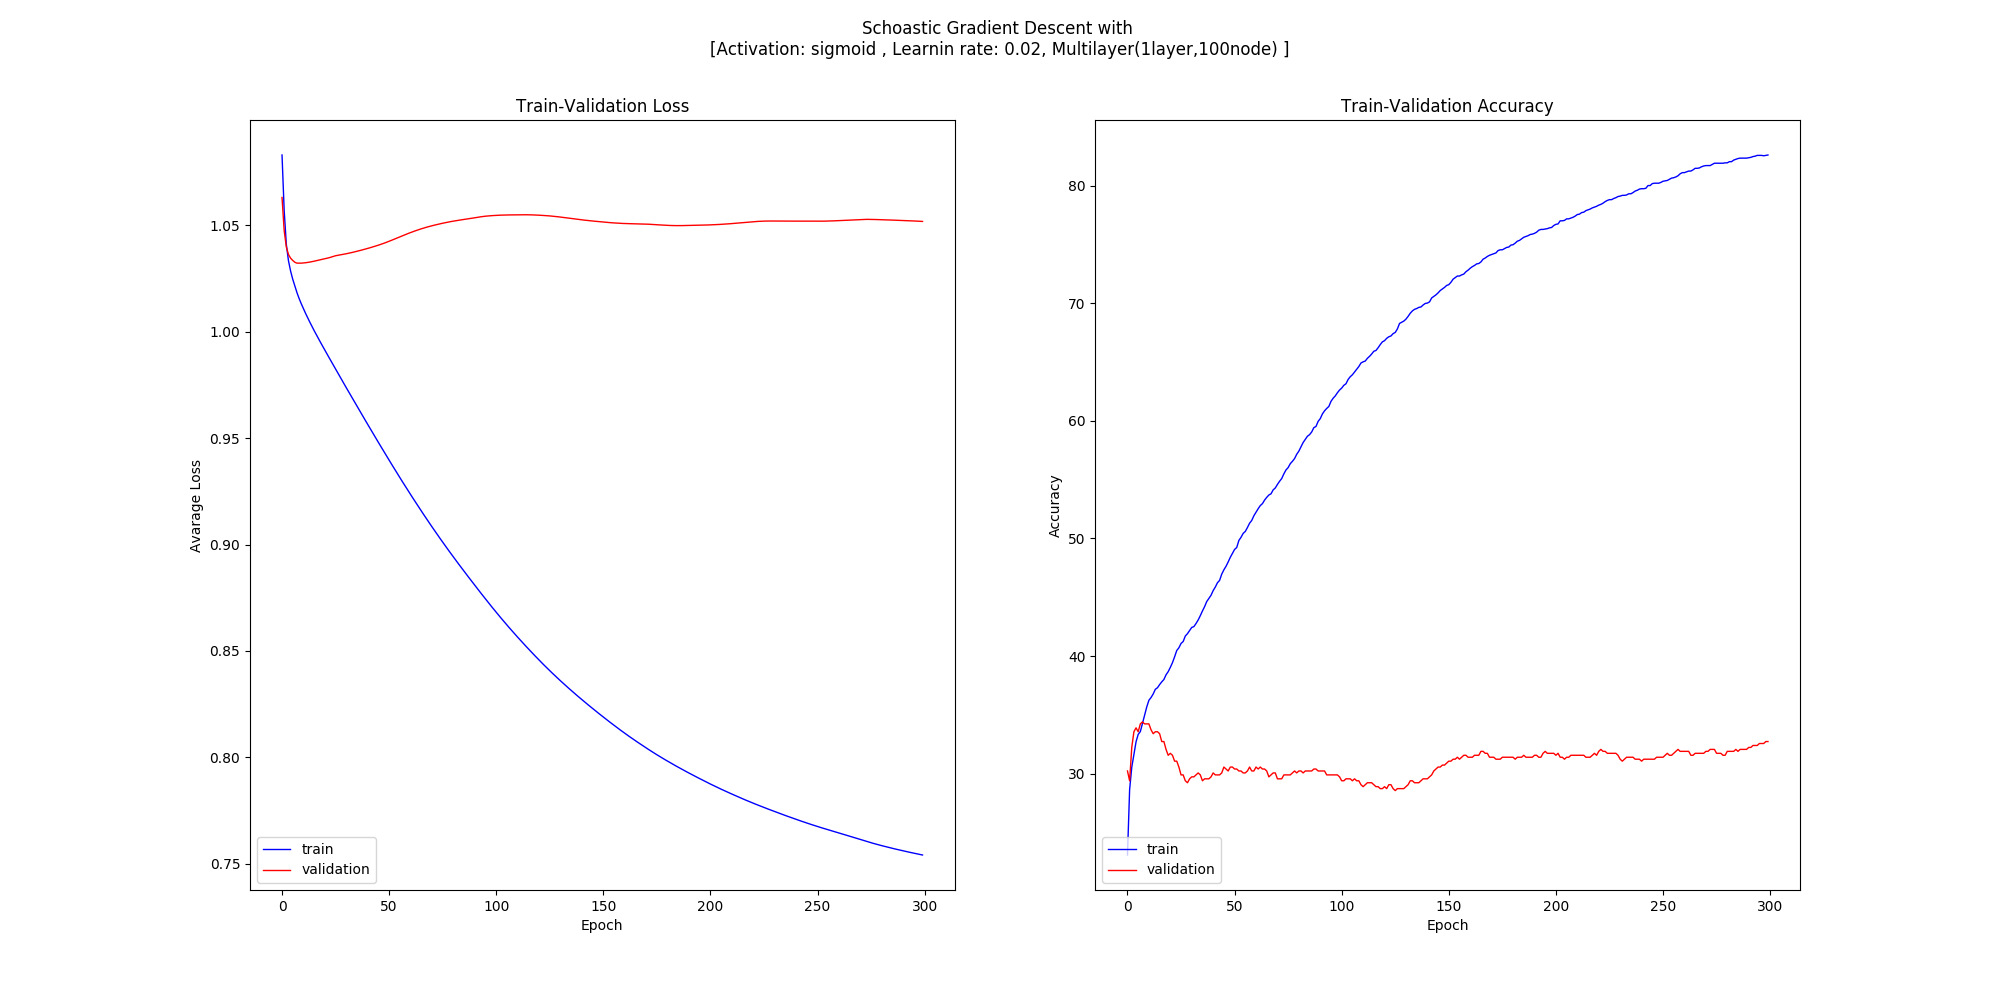
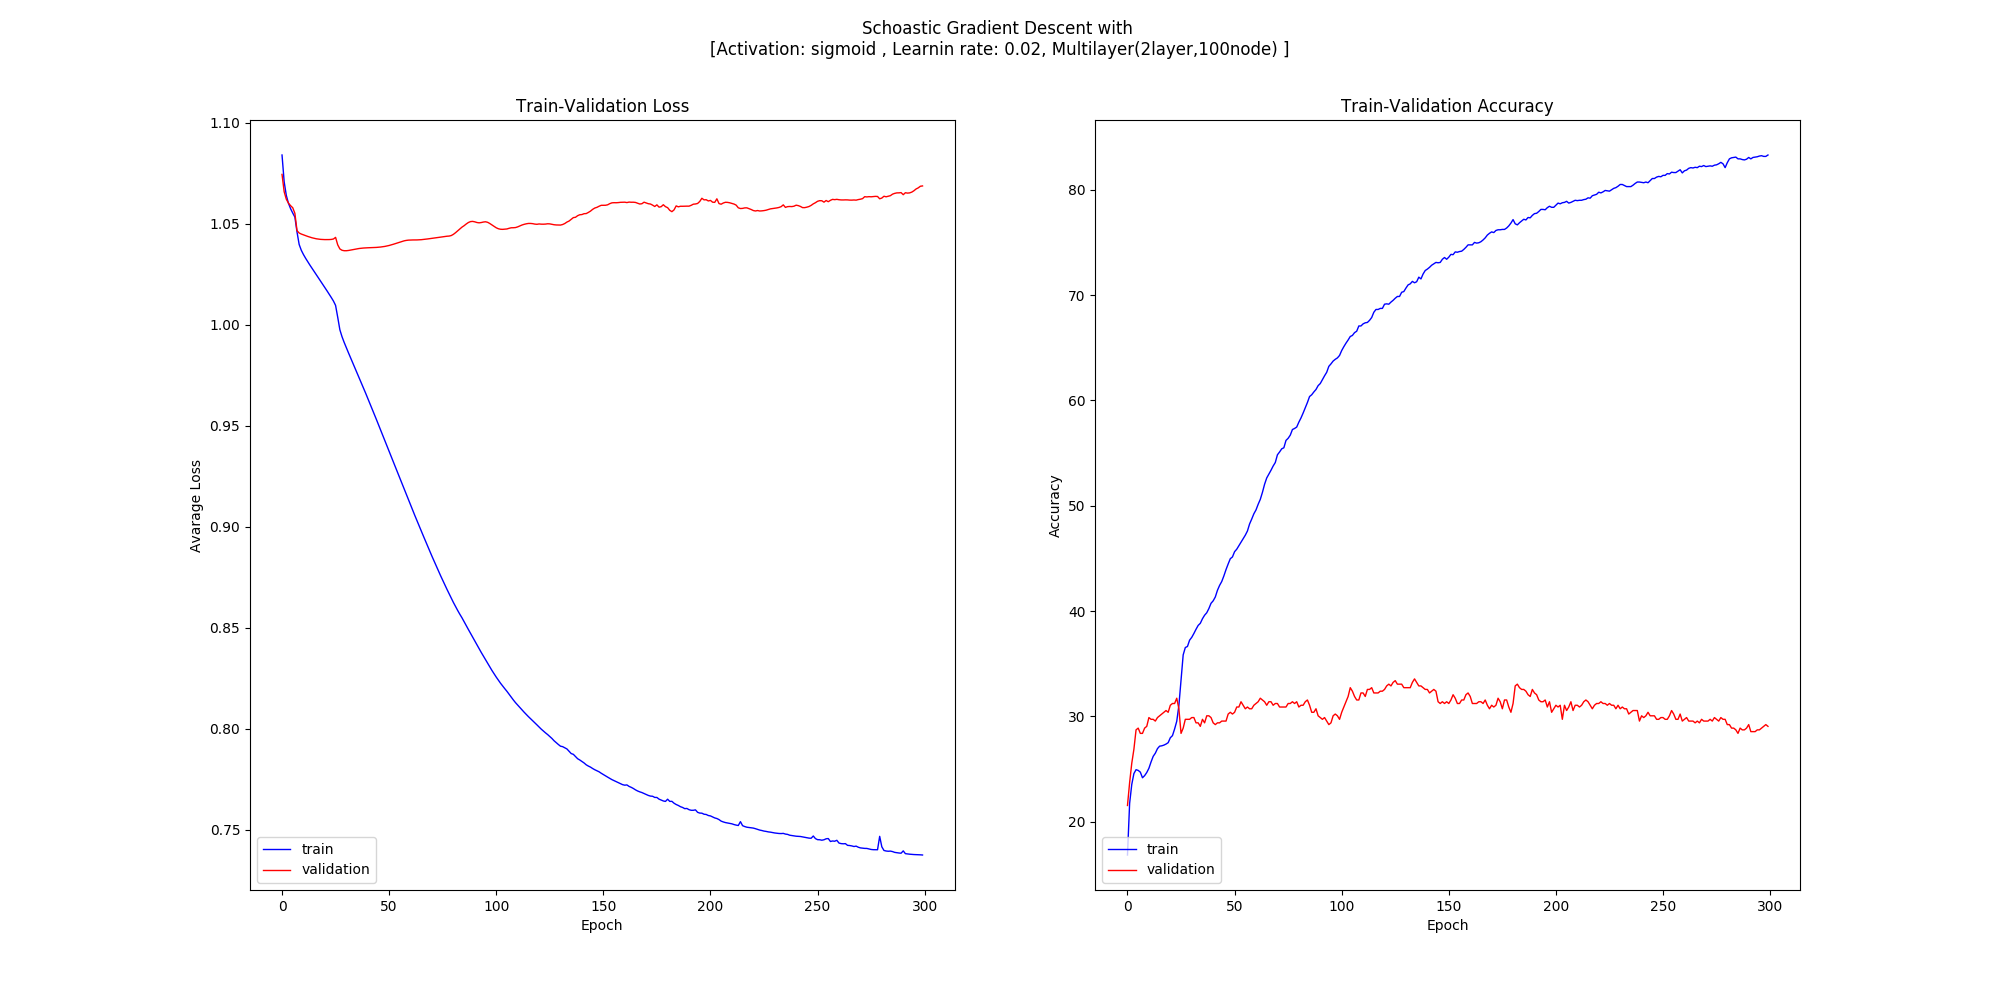

In multilayer, we see that the increase in the number of layers provides more reduction of total loss, while no significant differences can be observed between its correctors. 

The result is that the increase in the number of layers for this train data has resulted in more precise learning. we can easily understand that total loss is low.

#### Activation Function Effect

The problem I encountered when I used ReLu as an activation function for this training set was quickly overfit and the end of the learning event. this is because the derivative of the activation function is monotonic
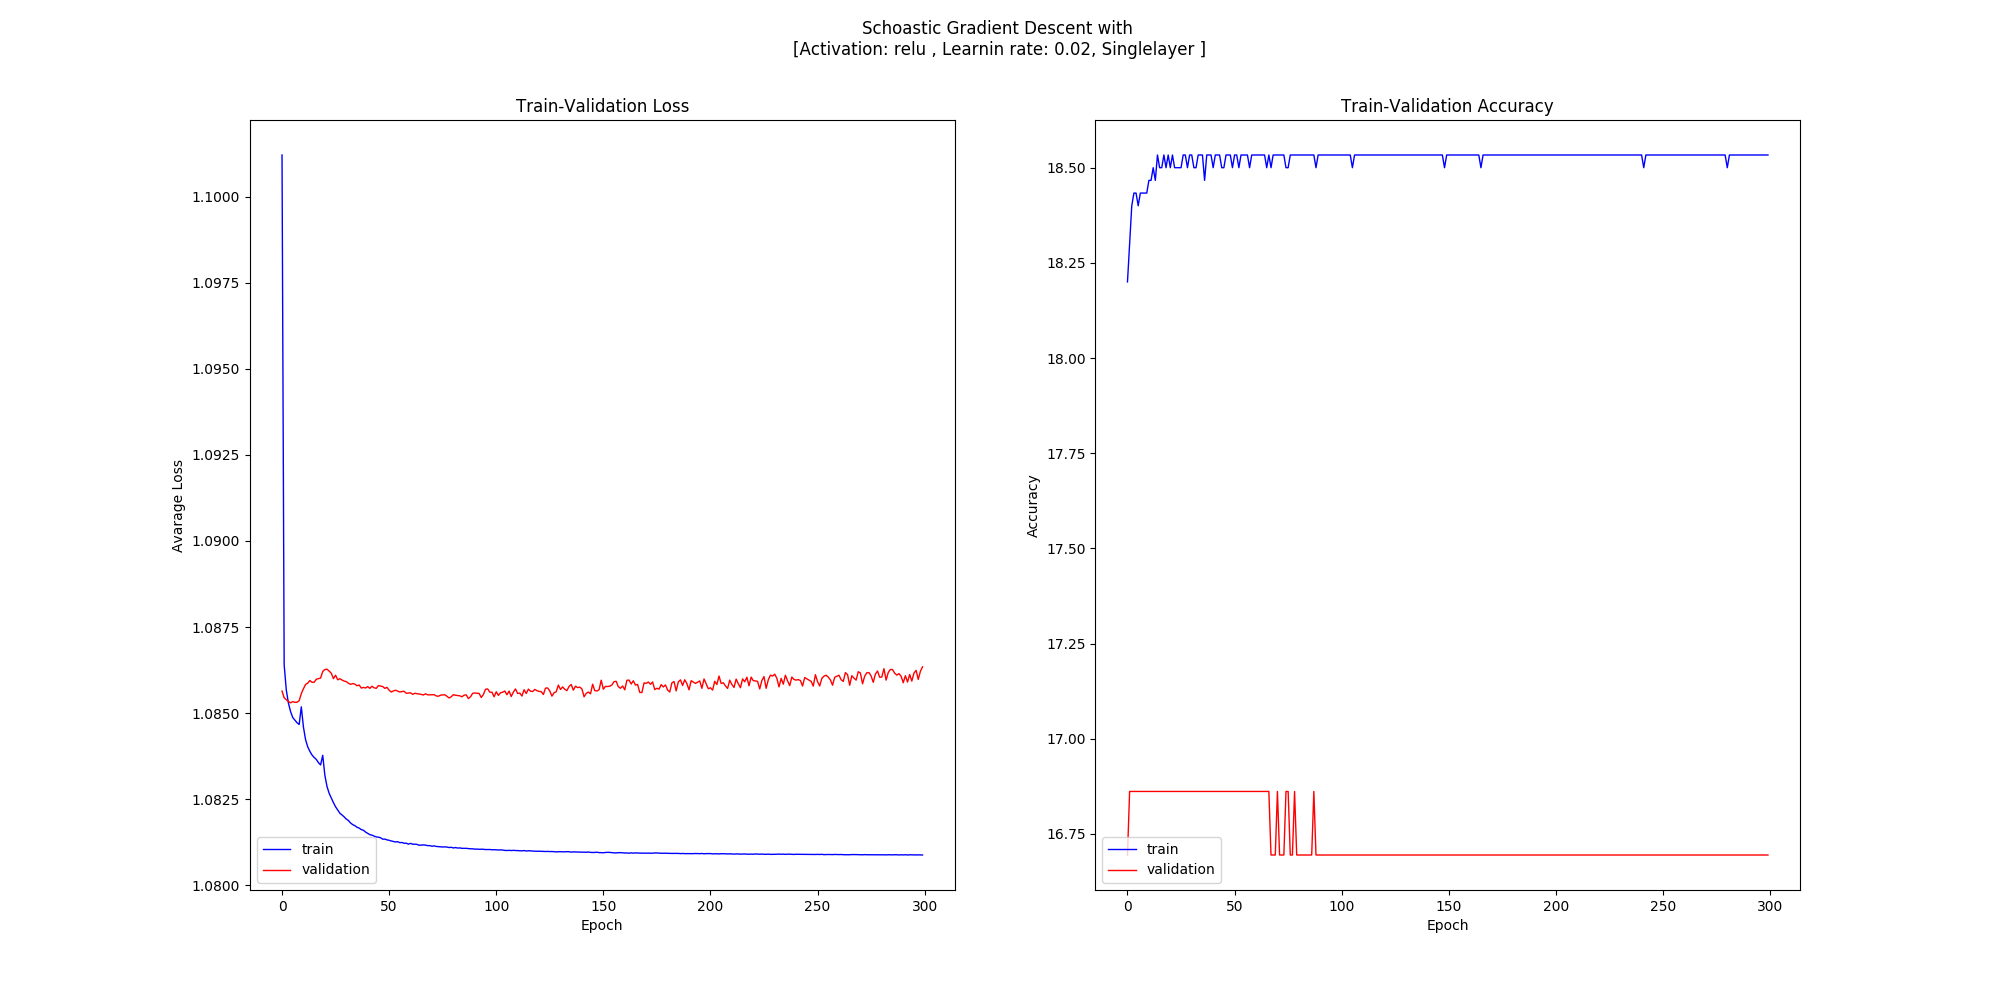

But when I use sigmoid as the activation function, linear totals are reduced between 1 and 0 and the probability of overfit decreases and learning continues successfully.
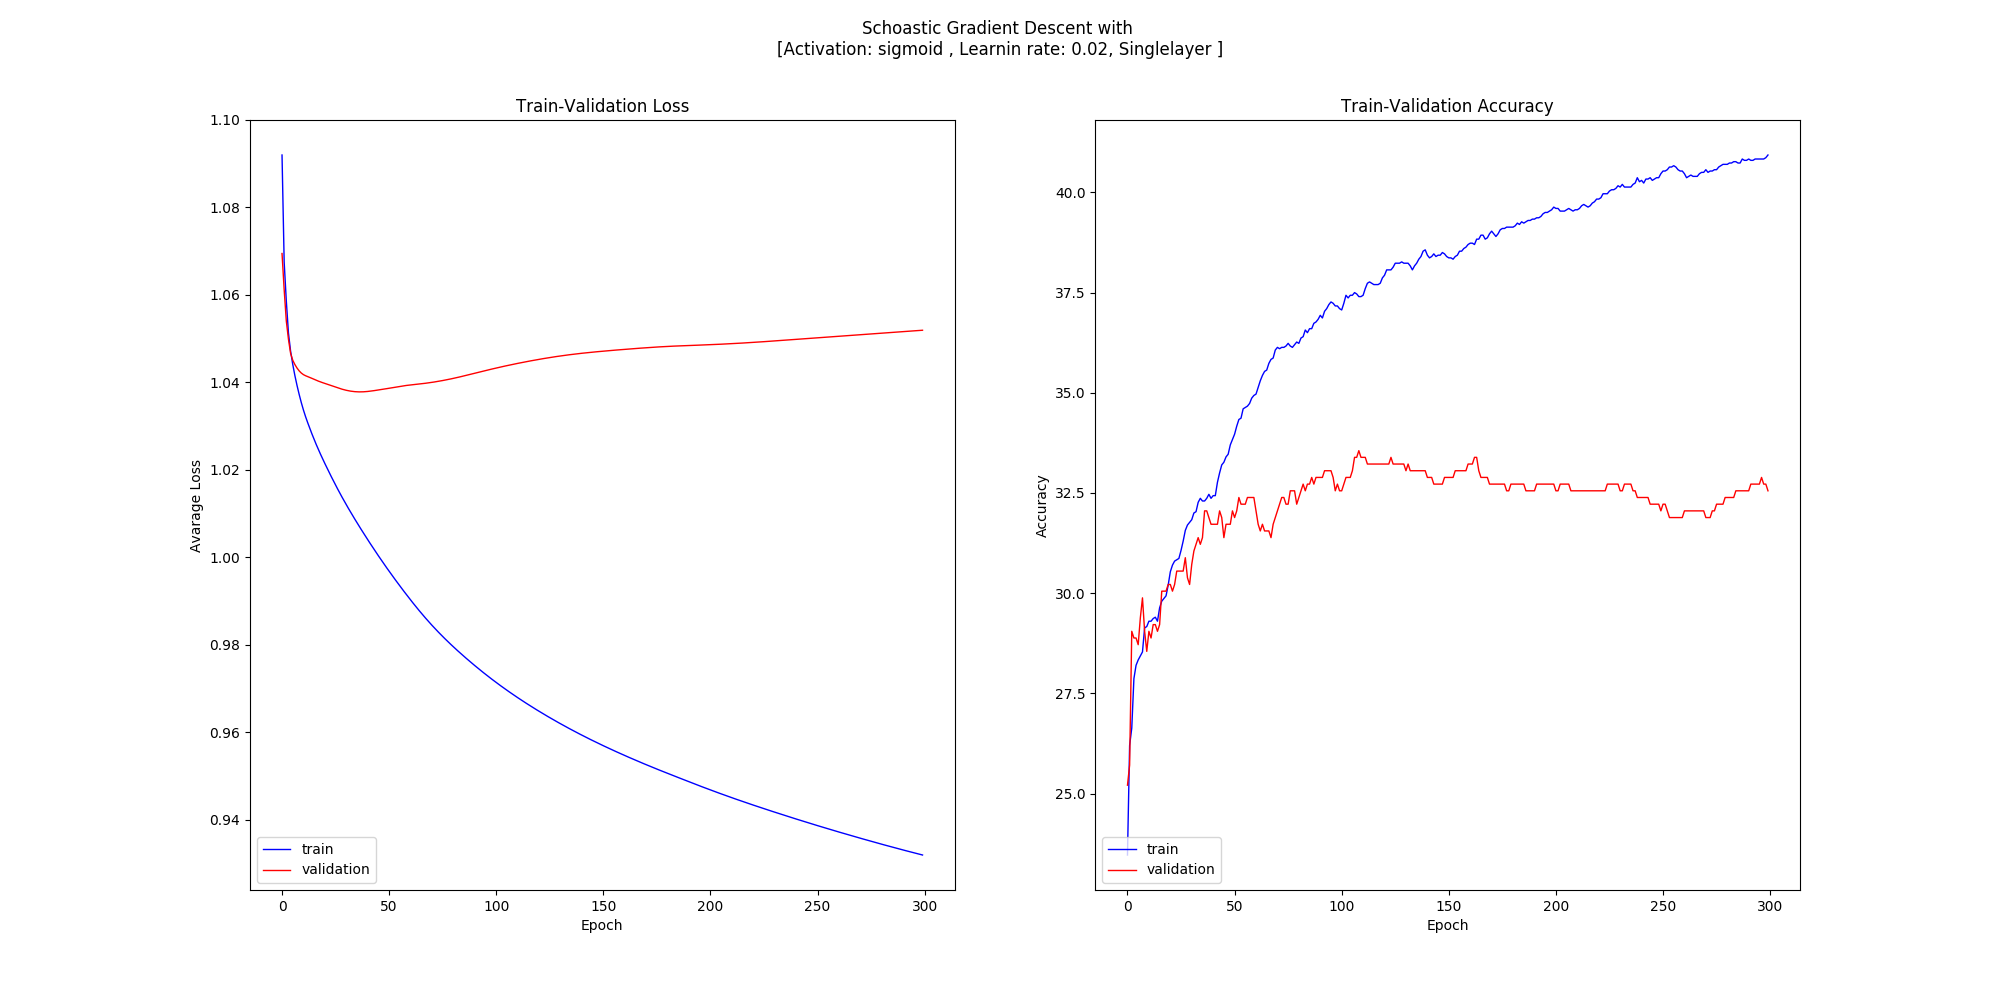

#### Batch Size Effect

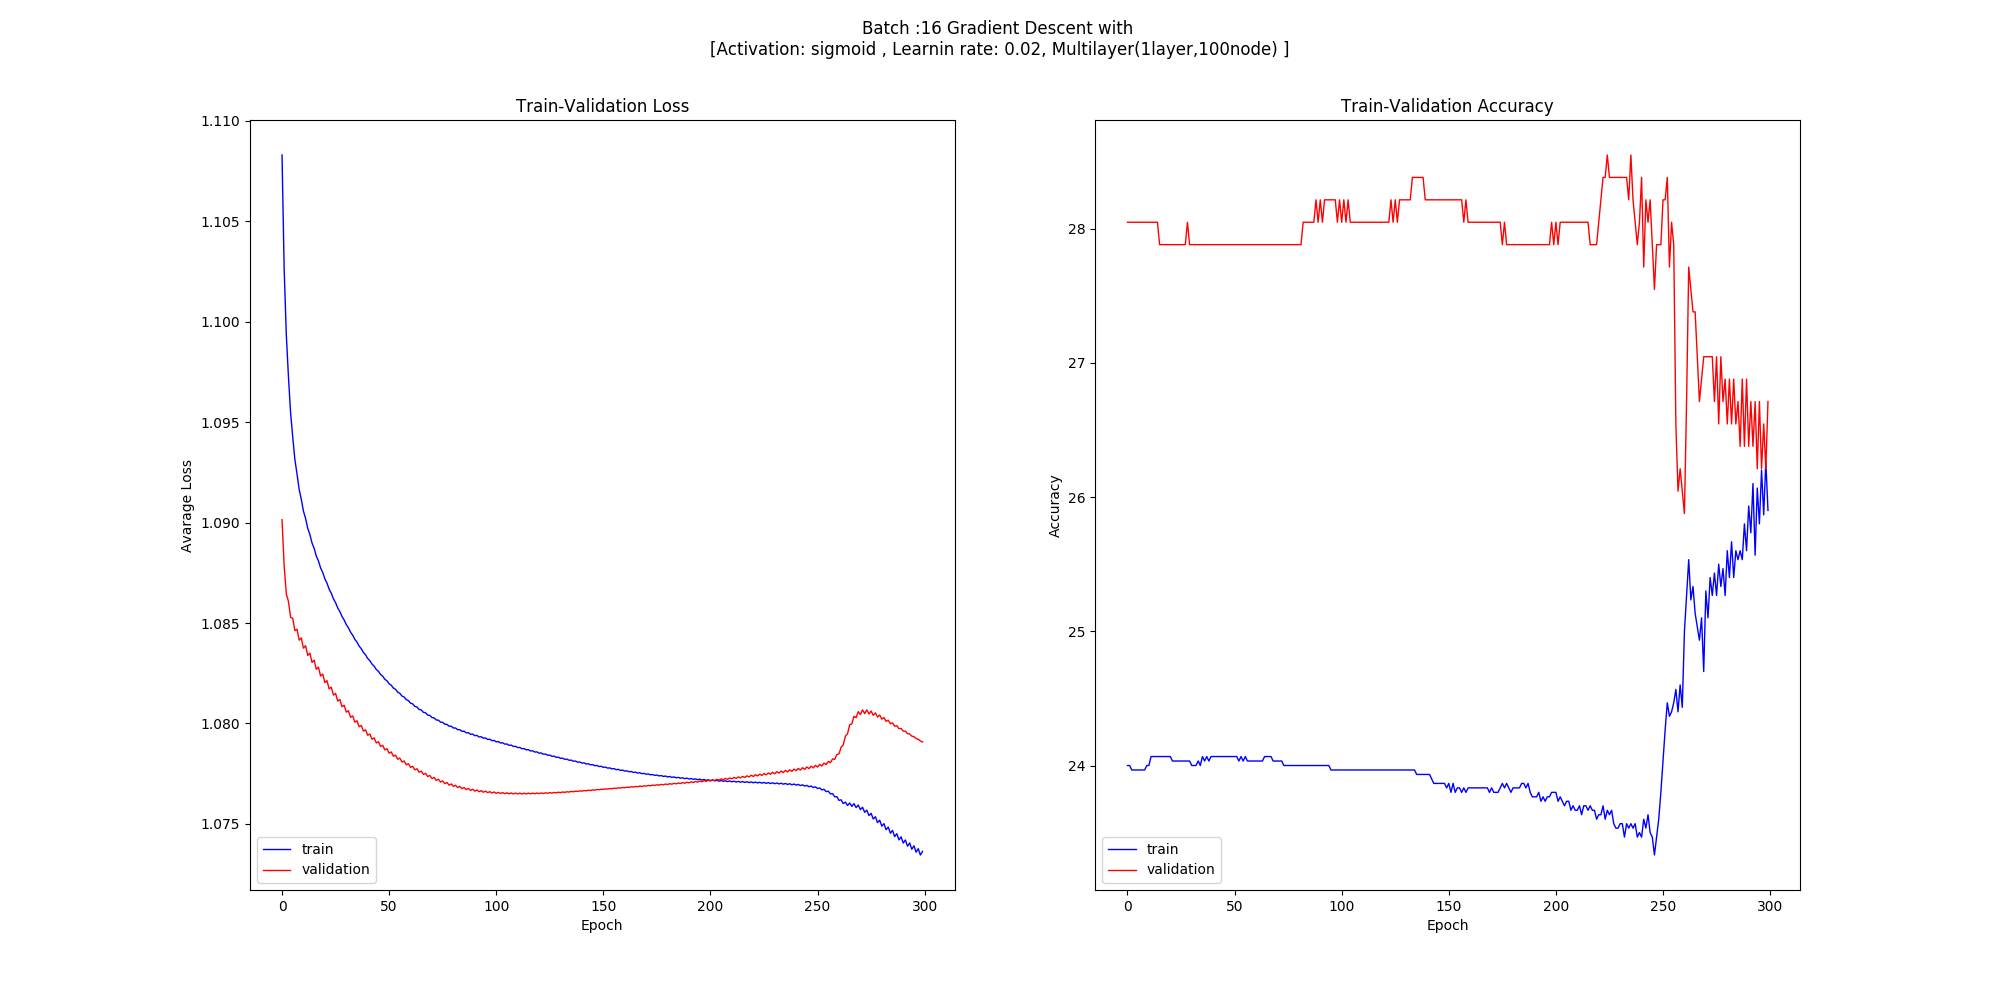
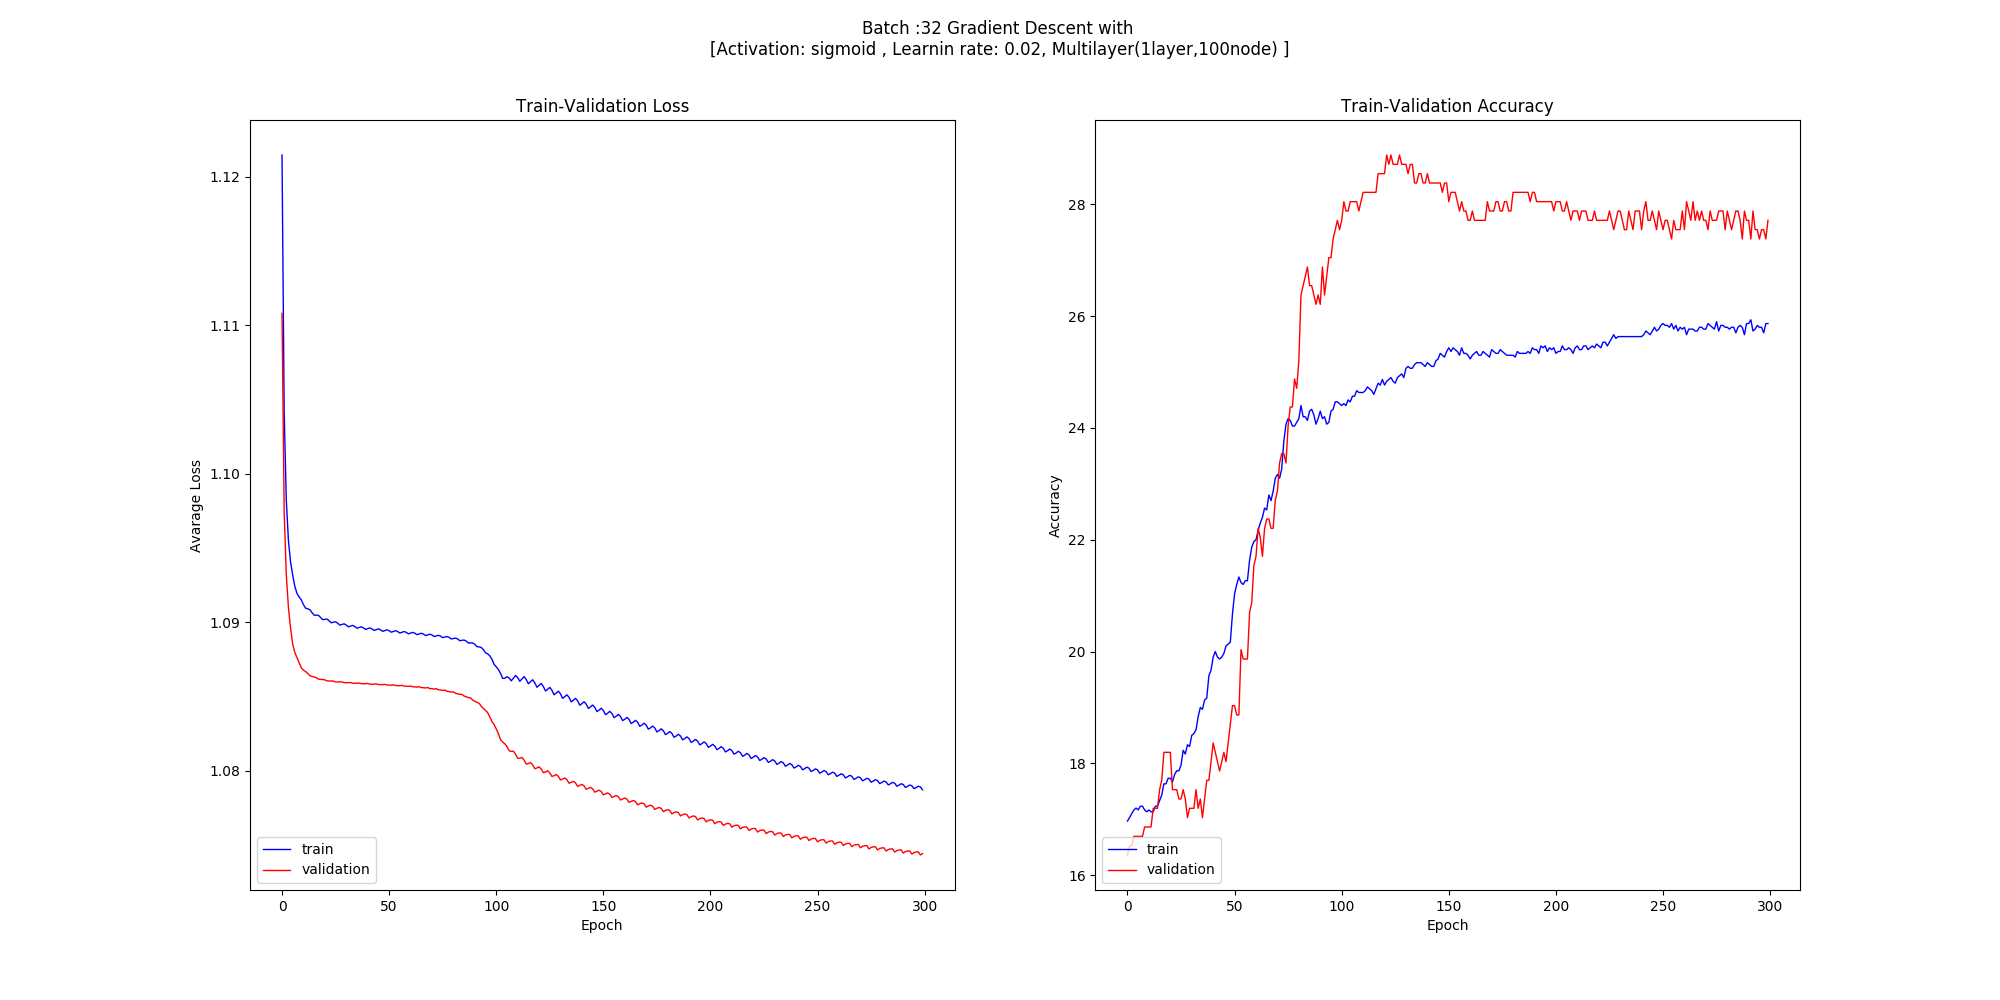
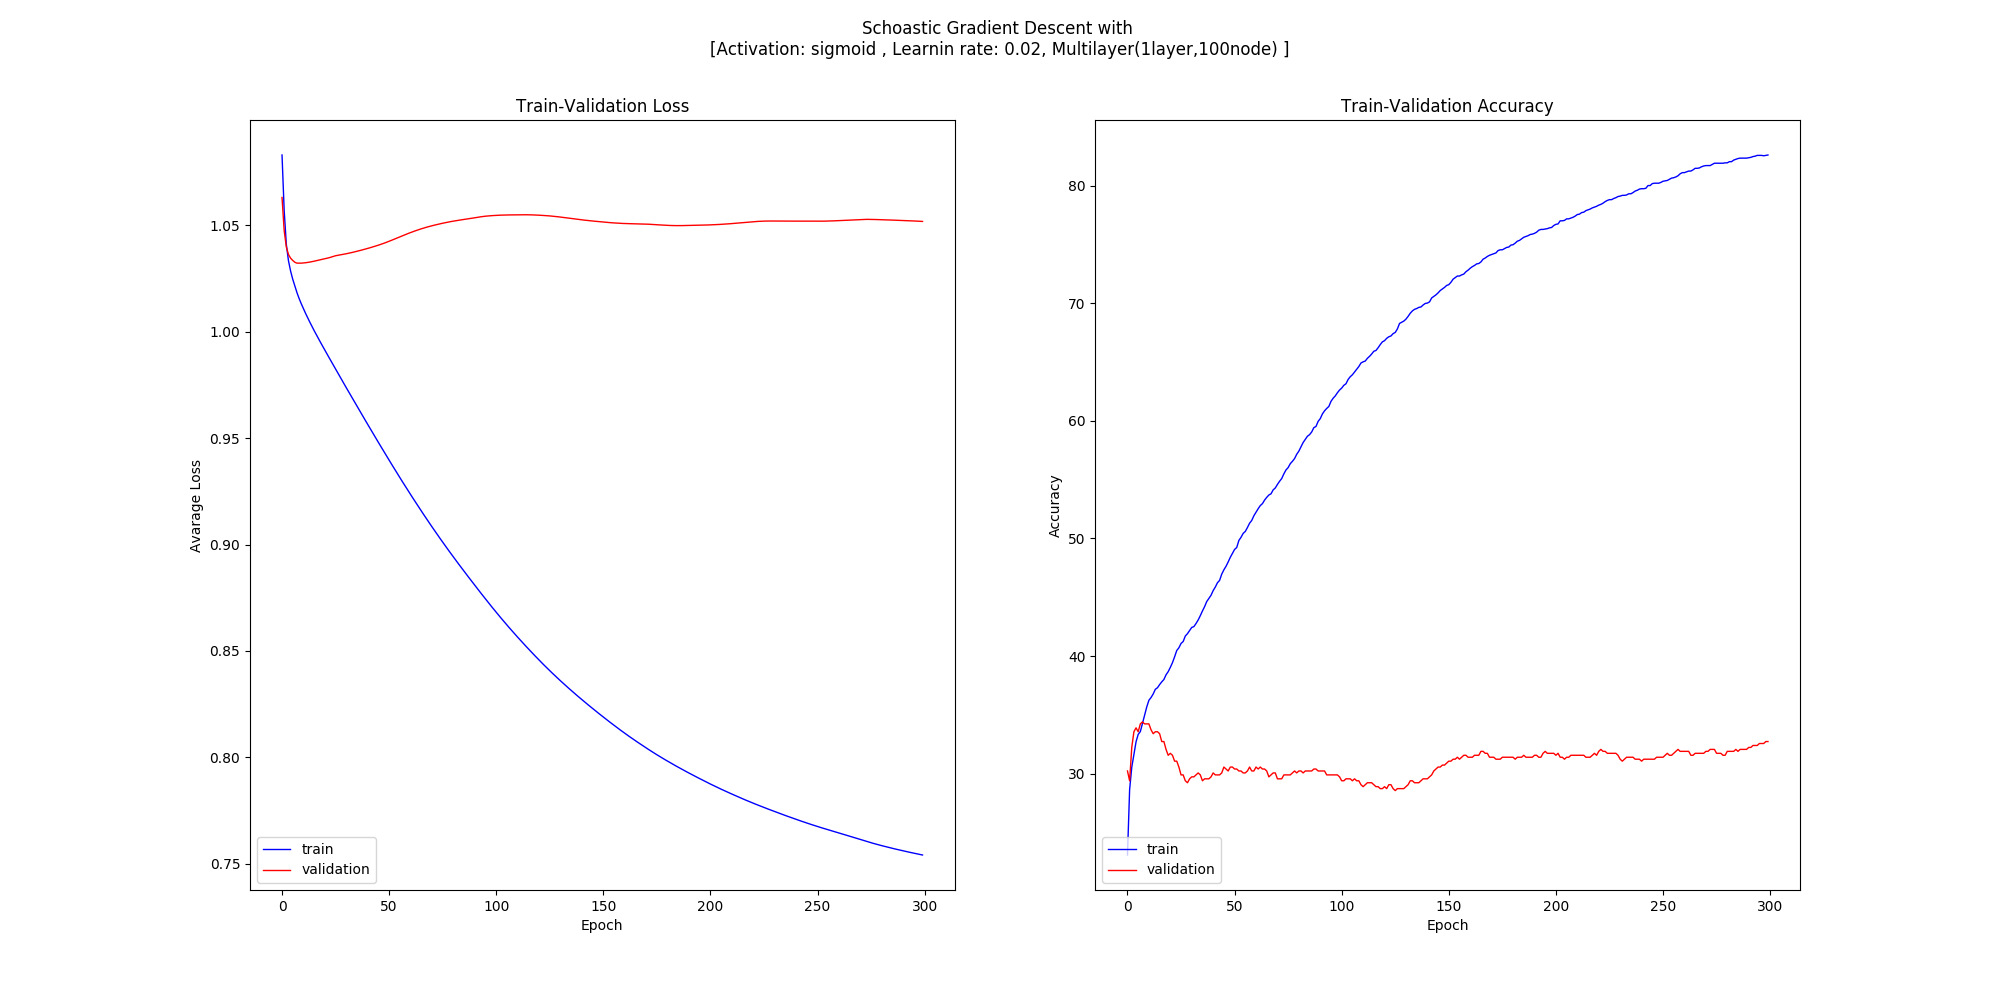

When we observe total loss according to the batch size change, the first thing that stands out is that the noise in the loss graph is directly related to the batch size. learning takes a little more power, but dramatically increases the speed of the algorithm. Because the main reason we use batch is that the backpropagation process slows down the learning process. When we use batch you get speed, but noise may be a bad thing. for example, a local minimum may never be stuck and may never face a global minimum. 

Especially when I use batch for this data, the loss decreases but because the local minima remains plugged in, the learning process is clogged with a accuracy of 30%.

But when I use the stochastic gradient descent, I can observe that 80% of train accuracy goes up.

#### Learning Rate Effect

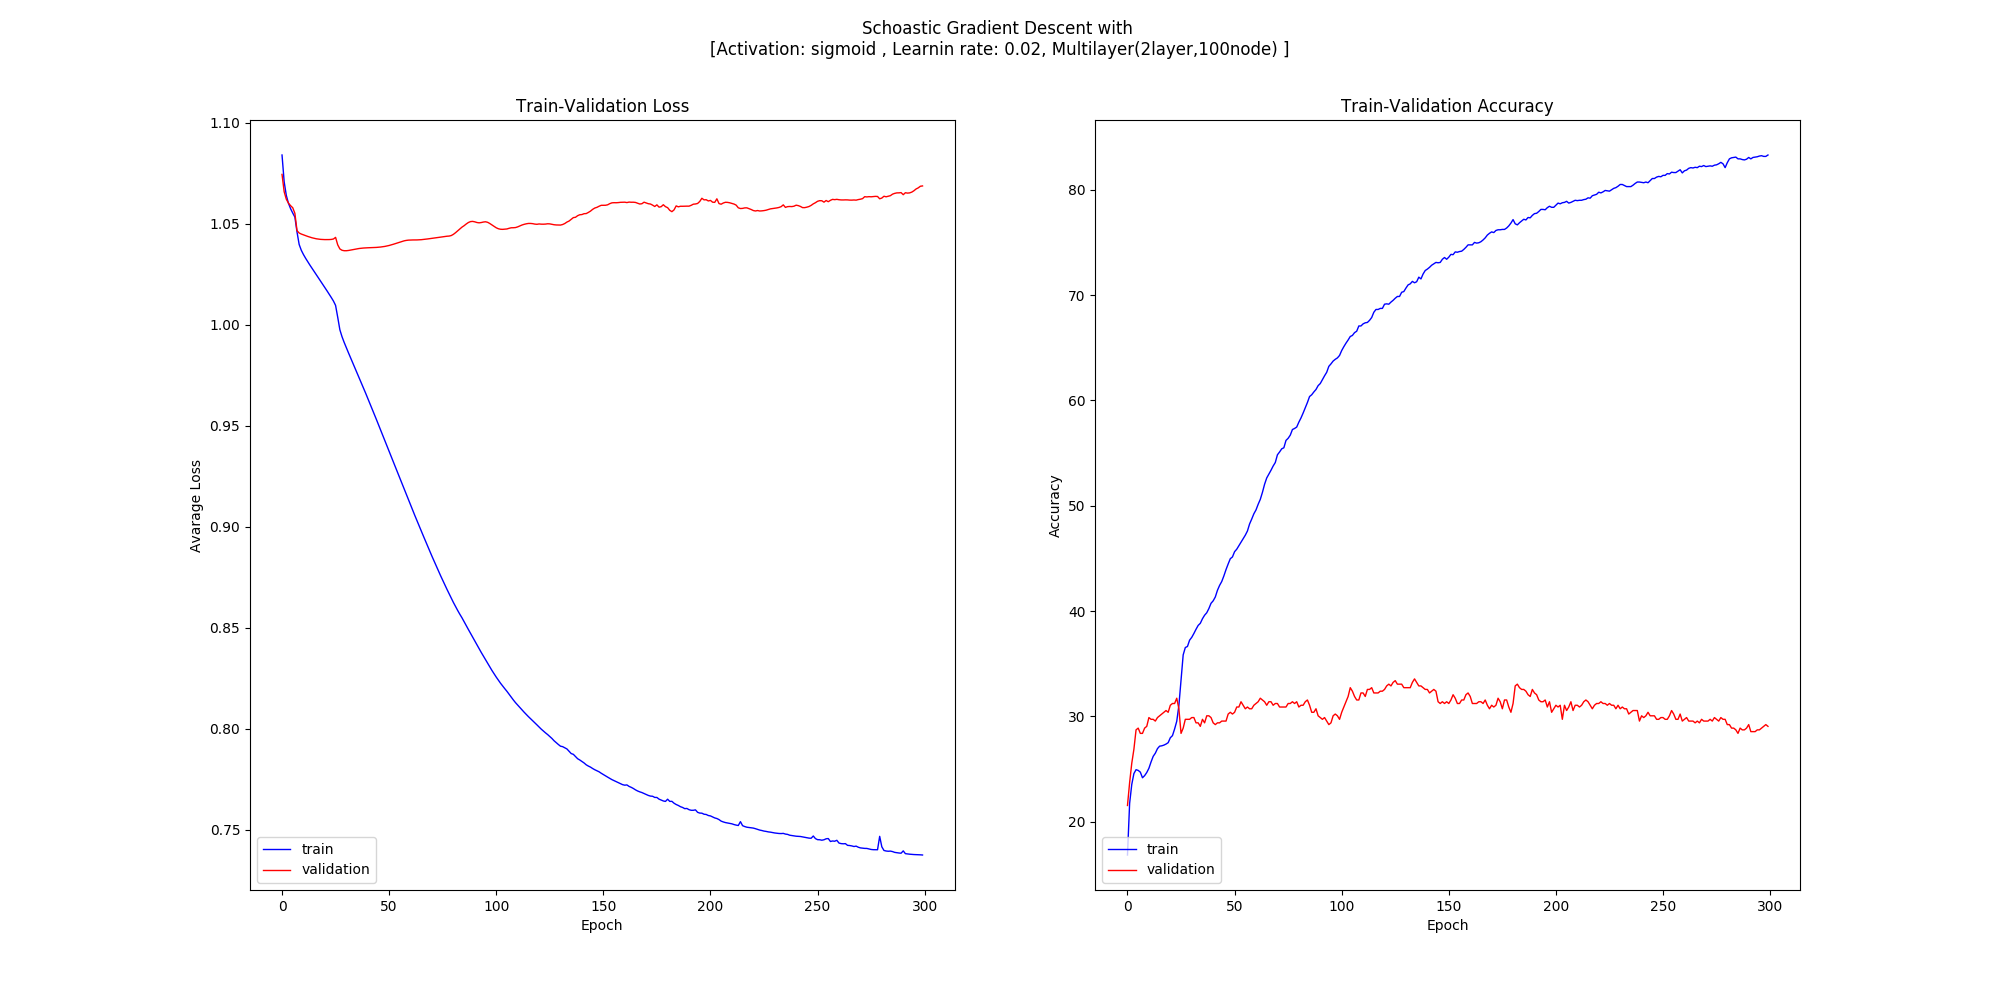
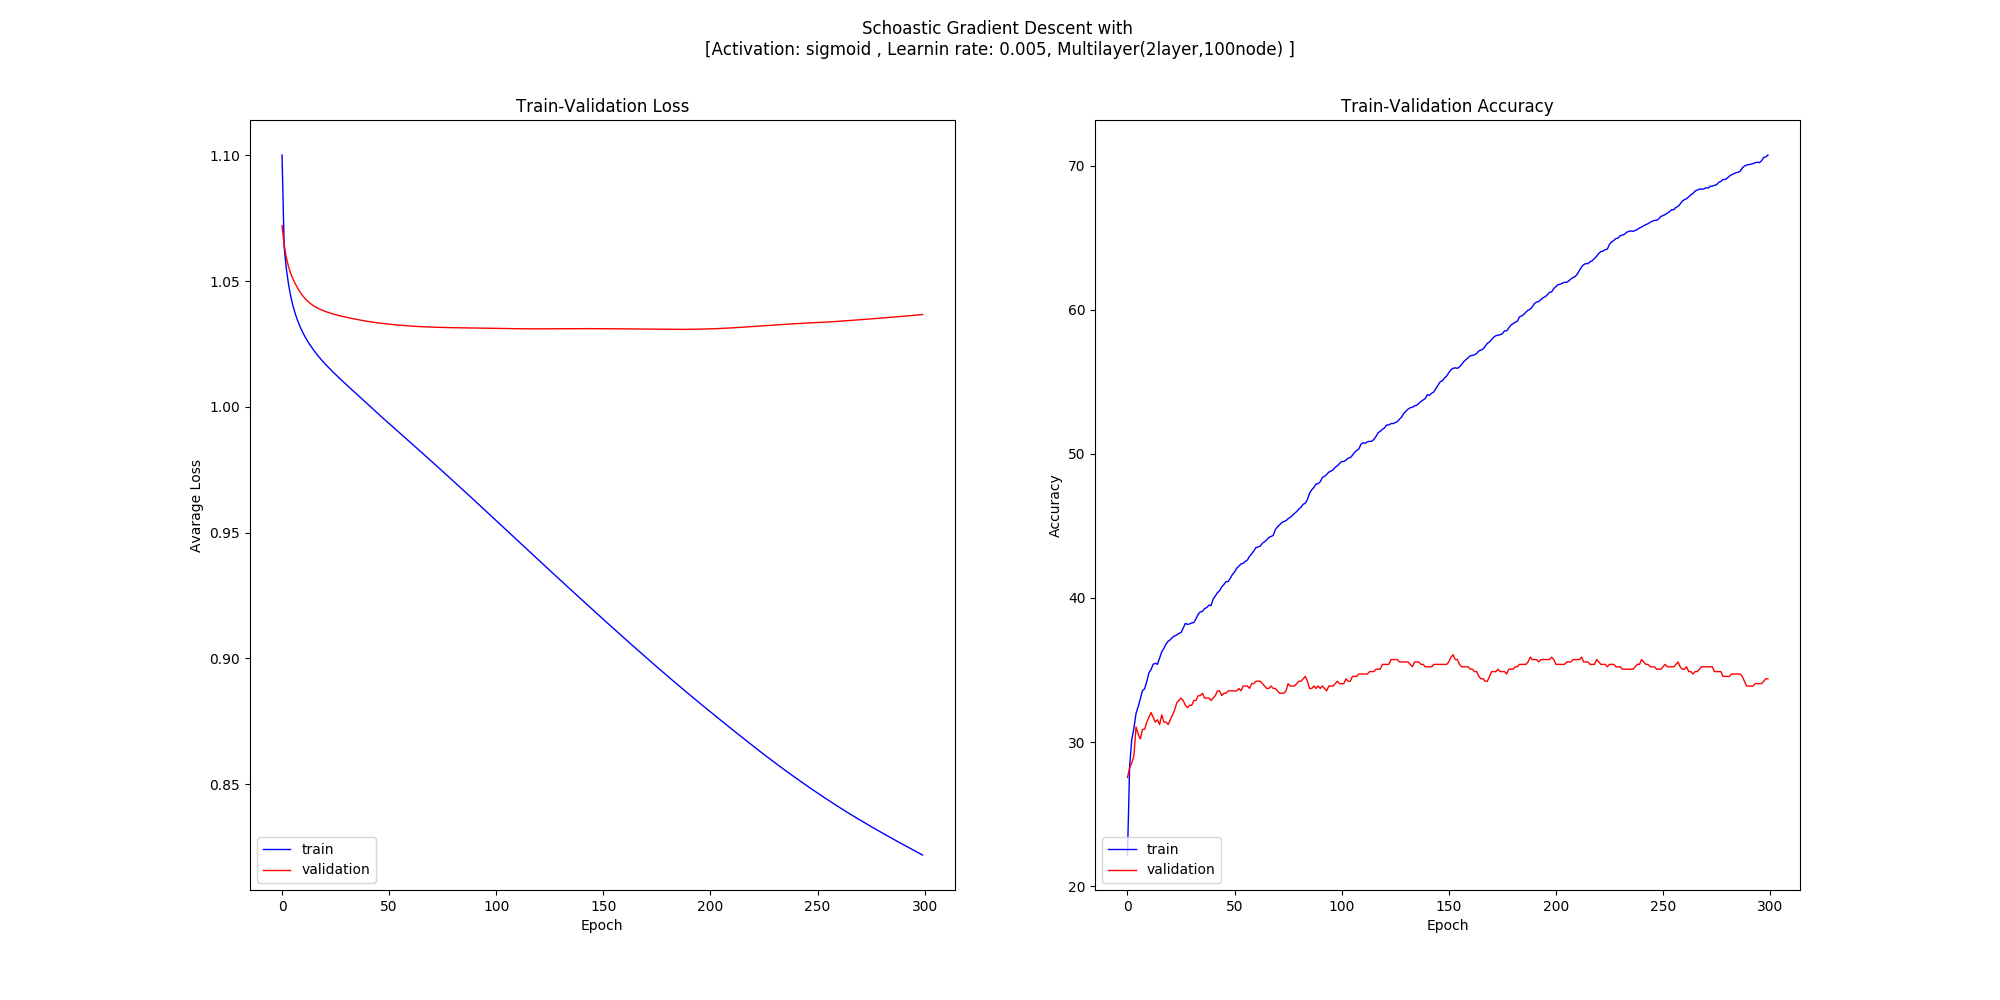

It is clear that we cannot make a serious inference from the loss graphs. but when we examine the accuracy graph, it is clearly seen that when the learning rate falls, the speed of learning decreases. because learning rate is a hyper parameter that determines the update-rate  at weights with which rate .

#### Epoch count Effect

The number of epoch determines the number of times the train operation is repeated. This is important because every epoch learning increases a little more. And the loss function is correct until it is reduced to a fixed value. So we can make our network learn more smoothly

## Conclusion

I have understood the differences between the single layer and the multilayer more clearly. According to the given data, I have observed that multi-player produces more logical results. but I believe that the validation accuracy is generally lower than train accuray because there is no data to clearly classify data. Or one of the reasons for this is the possibility that the network has memorized the data during the training process. I tried a lot of attempts to prevent this, but none of the validation accuracy has passed 30%. Finally, I have visualized my weight for each output in the single layer to understand what the weights actually provide. 

Class 0 weights :

Class 1 weights :

Class 2 weights :

Class 3 weights :

Class 4 weights :


In fact, these weights visually show the common theme of flowers that belong to a class. each node in the network indicates a theme. As the pictures corresponding to this theme arrive, thanks to the activation functions, a correct classification process can be made by passing the required weight for the correct class.

        

All results in the multilayer_results and singlelayer_results folders.

##                          $$\\Muhammed\,Enes\\KOÇAK\\21427119$$